In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 1.9 MB/s eta 0:01:07
   ---------------------------------------- 1.0/124.9 MB 2.3 MB/s eta 0:00:55
    --------------------------------------- 1.6/124.9 MB 2.3 MB/s eta 0:00:55
    --------------------------------------- 1.8/124.9 MB 2.3 MB/s eta 0:00:53
    --------------------------------------- 2.1/124.9 MB 1.9 MB/s eta 0:01:06
    --------------------------------------- 2.4/124.9 MB 1.9 MB/s eta 0:01:03
    --------------------------------------- 2.6/124.9 MB 1.8 MB/s eta 0:01:09
   - -------------------------------------- 3.1/124.9 MB 1.9 MB/s eta 0:01:04
   - -------------------------------------- 3.7/124.9 MB 2.0 MB/s eta 0:01:02
   - -------------------------------------- 4.2/124.9 MB 1.9 MB/s eta 0:01:03
   - -------------------------------------- 4.7/124.9 MB 2.0 MB/s eta 0:01:02


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [15]:
# Data collection & preprocessing...
housing_Data = pd.read_csv(r"C:\Users\omi84\OneDrive\Desktop\Anveshan\House-Price-Prediction\assets\HousingData.csv")
housing_Data.head(), housing_Data.describe(), housing_Data.shape

(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO       B  LSTAT  MEDV
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.98  24.0
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.14  21.6
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.03  34.7
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.94  33.4
 4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90    NaN  36.2,
              CRIM          ZN       INDUS        CHAS         NOX          RM         AGE         DIS         RAD         TAX     PTRATIO           B       LSTAT        MEDV
 count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000  486.000000  506.000000
 mean     3.611874   11.211934   11.083992    0.069959 

In [20]:
housing_Data.isnull().sum() #Counting the null elements in the dataset...

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
#fixing the null values...
housing_Data = housing_Data.interpolate()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,4.075,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.705,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.080,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.640,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.480,22.0


Understanding the correlation between the various columns...

In [21]:
correlation = housing_Data.corr()

<Axes: >

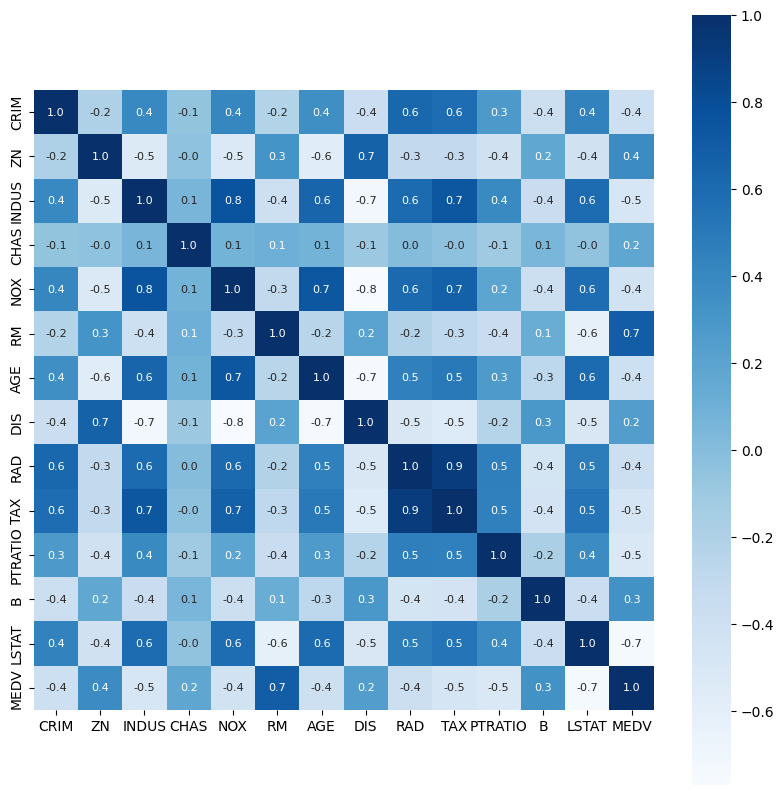

In [22]:
#constructing a heatmap to understand the correlation...
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [23]:
X = housing_Data.drop(['MEDV'], axis=1)
Y = housing_Data['MEDV']
X, Y

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO       B  LSTAT
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.98
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.14
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.03
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.94
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90    NaN
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...      ...     ...    ...
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273     21.0  391.99    NaN
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273     21.0  396.90   9.08
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273     21.0  396.90   5.64
 504  0.10959   0.0  11.93   0.0  0.573  6.794  89

In [24]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
X.shape, X_Train.shape, X_Test.shape

((506, 13), (404, 13), (102, 13))

In [26]:
#Model Training...
model = XGBRegressor()

In [29]:
#Training the model...
model.fit(X_Train,Y_Train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
#Prediction on training data...
training_prediction = model.predict(X_Train)
training_prediction

array([23.10556  , 20.995161 , 20.098679 , 34.694107 , 13.90913  ,
       13.503013 , 21.991356 , 15.19639  , 10.901248 , 22.69718  ,
       13.810051 ,  5.5994563, 29.803614 , 49.997128 , 34.89243  ,
       20.59913  , 23.397764 , 19.208693 , 32.69327  , 19.599798 ,
       26.990992 ,  8.401674 , 46.004715 , 21.697937 , 27.07413  ,
       19.372515 , 19.290953 , 24.80479  , 22.600445 , 31.683664 ,
       18.527308 ,  8.700464 , 17.40693  , 23.698957 , 13.300282 ,
       10.498531 , 12.704187 , 25.011072 , 19.698133 , 14.903836 ,
       24.199064 , 24.99671  , 14.903162 , 16.99955  , 15.596944 ,
       12.703466 , 24.515984 , 15.002214 , 49.998177 , 17.514849 ,
       21.200884 , 32.014084 , 15.601433 , 22.900557 , 19.30743  ,
       18.713701 , 23.301996 , 37.197086 , 30.099365 , 33.101482 ,
       21.000624 , 49.986263 , 13.402558 ,  5.005925 , 16.504436 ,
        8.400528 , 28.684137 , 19.482313 , 20.600052 , 45.402576 ,
       39.801155 , 33.39976  , 19.80939  , 33.399323 , 25.2878

There are mainly 2 ways to evaluate the regression model.
1. R2 Error
2. Mean absolute error

In [35]:
#R2 Error...
score1 = r2_score(Y_Train, training_prediction)
print("R Squared error : ", score1)

score2 = mean_absolute_error(Y_Train, training_prediction)
print('mean_absolute_error : ', score2)

R Squared error :  0.9999987142043713
mean_absolute_error :  0.007200302700005027


evaluating for testing data...

In [36]:
#Prediction on testing data...
testing_prediction = model.predict(X_Test)
testing_prediction

array([20.383139 , 22.656385 , 30.826708 , 27.878897 ,  8.805948 ,
       13.600548 , 26.303036 , 30.727125 , 17.798553 , 20.170778 ,
       26.527412 , 24.576565 , 20.54291  , 21.095081 , 26.6565   ,
       22.502972 , 18.869703 ,  9.9264145,  9.314949 , 14.770702 ,
       22.454021 , 19.507164 , 34.395382 , 17.945509 , 15.361209 ,
       18.913652 , 45.609146 , 33.094124 , 33.8779   , 19.872215 ,
       15.981635 , 19.835049 , 30.112732 , 23.200474 ,  9.11869  ,
       17.311817 ,  9.549464 , 21.379145 , 21.905293 , 21.554203 ,
       25.519806 , 13.072706 , 28.900301 ,  7.2484136, 21.321661 ,
       14.178026 , 34.397423 , 16.688627 , 30.466244 , 16.124792 ,
       31.119566 , 28.480316 ,  6.387809 , 32.930214 , 24.125877 ,
       19.955687 , 18.902025 , 19.524641 , 16.026045 , 22.490847 ,
       20.169174 , 19.523516 , 18.003931 , 28.294247 , 31.94455  ,
       25.29936  , 49.33432  , 30.476421 ,  9.341851 , 23.330816 ,
       15.17611  ,  7.1256075, 16.744974 , 18.707571 , 26.9436

In [38]:
#R2 Error...
score1 = r2_score(Y_Test, testing_prediction)
print("R Squared error : ", score1)

score2 = mean_absolute_error(Y_Test, testing_prediction)
print('mean_absolute_error : ', score2)

R Squared error :  0.8948011220086851
mean_absolute_error :  2.087377268660302


Visualizing the actual vs the predicted prices...

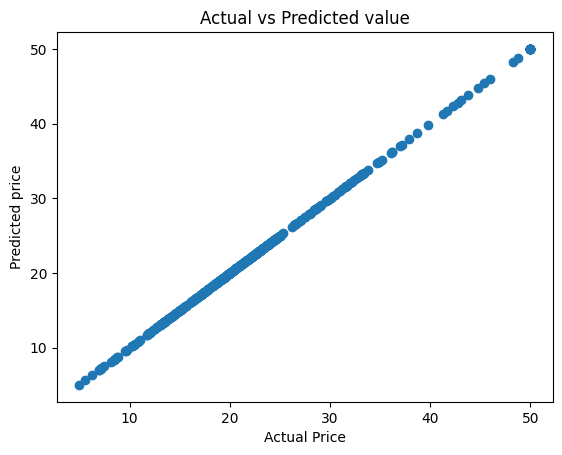

In [39]:
#On training Dataset...
plt.scatter(Y_Train, training_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted value(Training Dataset)")
plt.show()

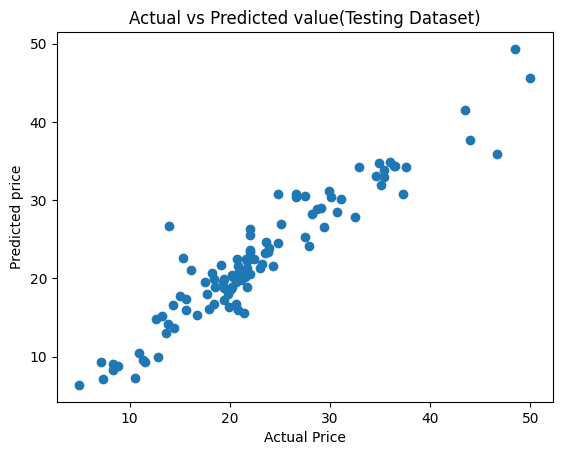

In [40]:
#On testing Dataset...
plt.scatter(Y_Test, testing_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted value(Testing Dataset)")
plt.show()